In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pylab as plt

In [2]:
data = pd.read_excel("Temporary_data3_Left_Right_Copy.xlsx")

TASK-7A: Please apply one-hot encoding method on one of the categorical variables (not SEX/gender) for the given AD dataset. Please explain what kind of transformation occured on the dataset.

In [3]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc = enc.fit_transform(data[['INDEPEND']]).toarray()
encoded_colm = pd.DataFrame(enc)

data = pd.concat([data, encoded_colm], axis=1)
df = data.drop(['INDEPEND'], axis=1)
print("Our one hot encoder will be end of the cloumns.")
df.head(10)

Our one hot encoder will be end of the cloumns.


,SEX,EDUC,MARISTAT,RESIDENC,NACCFAM,ANYMEDS,SMOKYRS,NACCTBI,DIABETES,ALCOHOL,...,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM,0,1,2,3
0,2,18,1,1,1,1,0,0,0,0,...,13.4250,1.7419,9.8700,1.6792,0.8906,1.1947,1.0,0.0,0.0,0.0
1,1,11,1,1,1,1,0,0,0,0,...,14.8800,2.3000,7.2700,1.8900,1.3800,2.0300,1.0,0.0,0.0,0.0
2,2,16,1,1,1,1,10,0,1,0,...,16.2300,2.0700,10.1100,1.8400,1.0100,1.5000,1.0,0.0,0.0,0.0
3,1,14,1,1,0,1,0,0,1,0,...,15.1100,1.6400,10.3900,1.8300,0.7400,1.1000,1.0,0.0,0.0,0.0
4,1,16,1,2,0,1,50,0,0,0,...,13.3763,1.6270,7.5844,1.4595,0.6638,0.8527,1.0,0.0,0.0,0.0
5,1,12,6,1,1,1,20,0,0,0,...,16.7300,2.1500,8.8800,1.7800,0.6600,1.1000,1.0,0.0,0.0,0.0
6,1,16,1,1,1,1,0,0,0,0,...,11.3300,1.5600,7.8800,1.9100,0.5800,0.8800,1.0,0.0,0.0,0.0
7,2,18,1,1,0,1,0,0,0,0,...,13.4900,2.3700,9.5300,1.8700,0.8800,1.4600,0.0,1.0,0.0,0.0
8,2,16,1,1,1,1,20,0,0,0,...,9.6500,1.7800,9.3700,2.0400,0.6200,1.6500,1.0,0.0,0.0,0.0
9,2,18,1,1,0,1,0,0,0,0,...,13.5698,2.3649,10.4055,1.9661,0.8163,1.6182,1.0,0.0,0.0,0.0


Another way to one-hot-encoder

In [4]:
data['INDEPEND'].unique()
data['INDEPEND'].value_counts()

1    1013
2     263
3      69
4       9
Name: INDEPEND, dtype: int64

In [5]:
data['MARISTAT'].unique()
data['MARISTAT'].value_counts()

1    876
2    247
3    149
5     53
6     24
4      5
Name: MARISTAT, dtype: int64

In [6]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['INDEPEND', 'MARISTAT'])
print(one_hot_encoded_data)

      SEX  EDUC  RESIDENC  NACCFAM  ANYMEDS  SMOKYRS  NACCTBI  DIABETES  \
0       2    18         1        1        1        0        0         0   
1       1    11         1        1        1        0        0         0   
2       2    16         1        1        1       10        0         1   
3       1    14         1        0        1        0        0         1   
4       1    16         2        0        1       50        0         0   
...   ...   ...       ...      ...      ...      ...      ...       ...   
1349    1    20         1        1        1        0        0         0   
1350    1    16         1        0        1        0        0         0   
1351    2    14         1        1        1        0        0         0   
1352    2    20         1        1        1       25        0         0   
1353    2    14         1        1        1       10        0         0   

      ALCOHOL  HXHYPER  ...  INDEPEND_1  INDEPEND_2  INDEPEND_3  INDEPEND_4  \
0           0       

TASK-7B: Please provide a couple of pivot tables in order to illustrate how SEX variable is influential on our target array (CDRGLOB). Please provide a few multidimensional analyses (not limited to two variables).

In [7]:
indpnd = pd.cut(data['INDEPEND'], [0, 1, 2,3])
data.pivot_table('CDRGLOB', ['SEX', indpnd], 'APA')

APA                  0         1
SEX INDEPEND                    
1   (0, 1]    0.436261  1.173913
    (1, 2]    1.475000  1.542373
    (2, 3]    2.125000  2.346154
2   (0, 1]    0.288696  0.923077
    (1, 2]    1.271605  1.534884
    (2, 3]    2.136364  2.230769

In [8]:
data.groupby('SEX')[['CDRGLOB']].mean()

,CDRGLOB
SEX,
1,0.883882
2,0.588160


In [9]:
data.groupby(['SEX', 'MARISTAT'])['CDRGLOB'].aggregate('mean').unstack()

MARISTAT,1,2,3,4,5,6
SEX,,,,,,
1,0.936345,0.450000,0.851852,0.000000,0.636364,0.600000
2,0.604113,0.729469,0.409836,0.333333,0.357143,0.357143


In [10]:
rsupfrm = pd.qcut(data["RSUPFRM"], 4)
data.pivot_table("SEX", index="CDRGLOB", columns=rsupfrm)

RSUPFRM,"(0.901, 1.988]","(1.988, 2.198]","(2.198, 2.376]","(2.376, 4.06]"
CDRGLOB,,,,
0,1.602151,1.657343,1.698324,1.679654
1,1.467532,1.470149,1.512397,1.643678
2,1.444444,1.456522,1.379310,1.444444
3,1.350000,1.437500,1.500000,1.666667


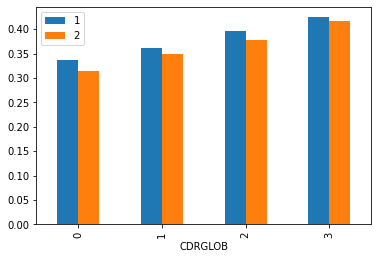

In [32]:
data.pivot_table("CSFVOL", index="CDRGLOB", columns="SEX").plot(kind="bar")
plt.legend()

TASK-7C: Referring to the problem in part B, please provide a potential solution to the gender-based issue that appears as a bottleneck for the model development phase. One possible solution might be to provide normalization of the numeric columns with respect to the total brain volume (NACCBRNV column).

In [16]:
referring_data= data.iloc[:,37:-6].div(data.NACCBRNV,axis=0)
referring_data

,NACCICV,NACCBRNV,NACCWMVL,CSFVOL,GRAYVOL,WHITEVOL,WMHVOL,CEREALL,CERETISS,CERECSF,...,RROSMF,RROSMFM,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM
0,1.250353,1.0,0.430592,0.249987,0.569773,0.430227,0.000365,1.062829,0.851212,0.211614,...,0.009880,0.001870,0.024938,0.001980,0.009248,0.001521,0.011998,0.001557,0.008821,0.001501
1,1.424762,1.0,0.431451,0.423173,0.570138,0.429862,0.001589,1.248402,0.880778,0.367624,...,0.007565,0.001598,0.026235,0.002428,0.008351,0.001472,0.013433,0.002076,0.006563,0.001706
2,1.225458,1.0,0.444088,0.224296,0.557074,0.442926,0.001162,1.049901,0.871725,0.178176,...,0.007998,0.002130,0.027783,0.002138,0.011526,0.001313,0.013664,0.001743,0.008512,0.001549
3,1.340097,1.0,0.429433,0.337873,0.572790,0.427210,0.002224,1.118978,0.865950,0.253028,...,0.011799,0.002250,0.028404,0.002161,0.008643,0.001300,0.013548,0.001470,0.009316,0.001641
4,1.472360,1.0,0.438119,0.464283,0.569958,0.430042,0.008077,1.262842,0.872748,0.390093,...,0.010989,0.001933,0.027655,0.001922,0.008980,0.001028,0.013182,0.001603,0.007474,0.001438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1.290772,1.0,0.455070,0.289110,0.546592,0.453408,0.001662,1.100470,0.867546,0.232923,...,0.009855,0.003171,0.021636,0.002325,0.009242,0.001903,0.012368,0.002527,0.008165,0.002067
1350,1.445689,1.0,0.449363,0.437067,0.559259,0.440741,0.008622,1.240003,0.861044,0.378962,...,0.012322,0.001962,0.020792,0.001761,0.008730,0.001246,0.009048,0.001596,0.008558,0.001718
1351,1.357799,1.0,0.420738,0.349720,0.587341,0.412659,0.008079,1.153496,0.859910,0.293586,...,0.008894,0.001947,0.022328,0.001985,0.011599,0.001432,0.011852,0.001863,0.008875,0.001629
1352,1.382142,1.0,0.441121,0.354461,0.586560,0.413440,0.027681,1.200412,0.899993,0.300420,...,0.009767,0.002297,0.028350,0.002197,0.009785,0.001537,0.012452,0.001899,0.010056,0.001935



TASK-7D: After the normalization process, please provide a correlation matrix to report the critical features that have high correlation (positive or negative) with the target array (CDRGLOB).

In [12]:
data.corr()[(data.corr()>0.40) | (data.corr()<-0.35)][16:17].dropna(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


,INDEPEND,CDRGLOB,APA,NACCMMSE,LHIPPO,RHIPPO,LLATVENT,RLATVENT,LENTM,LISTHCM,LSUPTEMM,RENTM,RPARHIPM,0,1,2
CDRGLOB,0.693881,1.0,0.448558,-0.74666,-0.442185,-0.424068,0.414033,0.406806,-0.453646,-0.372906,-0.36752,-0.478207,-0.371822,-0.658438,0.43829,0.434178


TASK-7E: Please develop 3 distinct formulas (in other words derived features like BMI score) that involve the critical features in Part-7D and then ensure that these derived features could be used as predictive variables for CDRGLOB (again correlation analysis will give you insight).

In [18]:
data["FIRST-FORMULA"]=data["LHIPPO"]*data["RHIPPO"]*data["LLATVENT"]-data["LENTM"]
data["SECOND-FORMULA"]=(data["INDEPEND"]+data["APA"])/data["RLATVENT"]
data["THIRD-FORMULA"]=data["NACCMMSE"]*data["RENTM"]-data["RPARHIPM"]+30

data[["FIRST-FORMULA","SECOND-FORMULA","THIRD-FORMULA","CDRGLOB"]].corr().iloc[-1:,:-1]

,FIRST-FORMULA,SECOND-FORMULA,THIRD-FORMULA
CDRGLOB,0.366286,0.066798,-0.614154


TASK-7F: Then please develop a machine learning model with the 3 derived features that you obtain in 7E via the use of train-test split (be careful about stratify parameter in this function) and gridsearchCV function as well as a classification algorithm (such as Gaussian Naive Bayes) but please do not forget to optimize its hyperparameters. Finally, please report your findings via the use of classification report function (also a sklearn function). 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [20]:
df=pd.concat([data["FIRST-FORMULA"], data["SECOND-FORMULA"],data["THIRD-FORMULA"]], axis=1)

In [24]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df, data["CDRGLOB"], random_state=0, train_size=0.8)
model_rfc=RandomForestClassifier()

In [25]:
model_rfc.fit(Xtrain, Ytrain)
ymodel_rfc = model_rfc.predict(Xtest)
print("The accuracy of the model relative to Random Forest Classifier",accuracy_score(Ytest, ymodel_rfc))

The accuracy of the model relative to Random Forest Classifier 0.5571955719557196


In [27]:
param_grid={
    'max_depth': [10,25,50],
    'max_features': [2, 3],
    'min_samples_split': [8, 10, 12],
    }

grid_search = GridSearchCV(estimator =model_rfc, param_grid = param_grid, cv = 5, n_jobs = -1,verbose=1)
grid_search.fit(Xtrain, Ytrain)
ymodel_gs = grid_search.predict(Xtest)
print("The accuracy of the model relative to Grid Search",accuracy_score(Ytest, ymodel_gs))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
The accuracy of the model relative to Grid Search 0.6125461254612546


In [31]:
print(classification_report(Ytest, ymodel_rfc))

              precision    recall  f1-score   support

           0       0.63      0.77      0.70       128
           1       0.46      0.37      0.41       102
           2       0.39      0.34      0.37        32
           3       0.60      0.33      0.43         9

    accuracy                           0.56       271
   macro avg       0.52      0.46      0.48       271
weighted avg       0.54      0.56      0.54       271

